In [1]:
%matplotlib inline

In [4]:
import pylab
import numpy as np
import astroML
from astroML import stats
import astroML.density_estimation
import scipy.stats
import scipy.special
import scipy.interpolate
import matplotlib.patches

### Uniform

In [5]:
x = np.random.random(1000)
q25, q50, q75 = np.percentile(x, [25, 50, 75])
print(q50)

0.511942519611


In [6]:
dist = scipy.stats.uniform(0, 2) # left edge = 0,
# width = 2
r = dist.rvs(10) # ten random draws
p = dist.pdf(1) # pdf evaluated at x=1
print(r, p)

[ 1.25424678  1.75007529  1.52795338  0.07255817  0.01432285  0.84686213
  1.68211983  0.17726036  0.99015736  1.47319231] 0.5


### Normal

In [7]:
np.random.seed(0)
x = np.random.normal(size=1000) # 1000 normally
# distributed points
stats.sigmaG(x)

0.96767271916940412

In [8]:
from scipy import stats
dist = stats.norm(0, 1) # mean = 0, stdev = 1 r = dist.rvs(10) # ten random draws
p = dist.pdf(0) # pdf evaluated at x=0
print(p)

0.398942280401


In [9]:
scipy.special.erf(1)

0.84270079294971478

### Binominal

In [10]:
dist = scipy.stats.binom(20, 0.7) # N = 20, b = 0.7 r = dist.rvs(10) # ten random draws
p = dist.pmf(8) # prob. evaluated at k=8
print(p)

0.0038592819309


In [11]:
vals = np.random.multinomial(n=10, 
                             pvals=[0.2, 0.3, 0.5]) # pvals sum to 1
print(vals)

[3 3 4]


### Poisson

In [12]:
dist = scipy.stats.poisson(5) # mu = 5
r = dist.rvs(10) # ten random draws
p = dist.pmf(3) # prob. evaluated at k=3
print(p)

0.140373895814


### Lorentzian

In [39]:
dist = scipy.stats.cauchy(0, 1) # mu = 0, gamma = 1 r = dist.rvs(10) # ten random draws
p = dist.pdf(3) # pdf evaluated at x=3
print(p)

0.0318309886184


### Laplace

In [41]:
dist = scipy.stats.laplace(0, 0.5) # mu = 0, delta = 0.5 r = dist.rvs(10) # ten random draws
p = dist.pdf(3) # pdf evaluated at x=3
print(p)

0.00247875217667


# $\chi^2$ Distribution

0.080656908173 [ 3.492439    5.95034351]


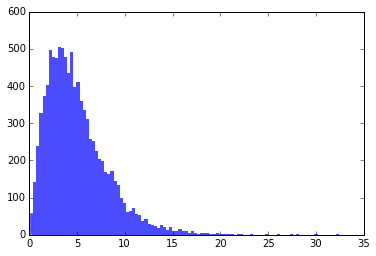

In [49]:
dist = scipy.stats.chi2(5) # k = 5
r = dist.rvs(10000) # ten random draws
p = dist.pdf(1) # pdf evaluated at x=1
print(p, r[:2])
_ = pylab.hist(r, 100, lw=0, alpha=0.7)

In [52]:
scipy.special.gamma(5)

24.0

### Student's t

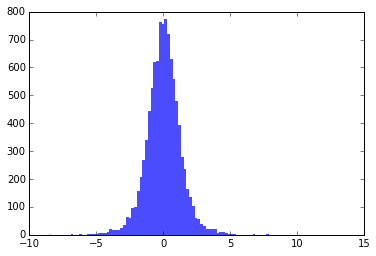

In [54]:
dist = scipy.stats.t(5) # k = 5
r = dist.rvs(10000) # ten random draws
p = dist.pdf(4)
_ = pylab.hist(r, 100, lw=0, alpha=0.7)

### Fischer's F

In [55]:
dist = scipy.stats.f(2,3) #d1=2,d2=3 r = dist.rvs(10) # ten random draws
p = dist.pdf(1) # pdf evaluated at x=1
print(p)

0.278854800927


### Beta, Gamma

In [57]:
dist = scipy.stats.beta(0.5, 1.5) # alpha = 0.5,
# beta = 1.5
r = dist.rvs(10) # ten random draws
p = dist.pdf(0.6) # pdf evaluated at x=0.6
print(p)

0.519797867489


In [59]:
dist = scipy.stats.gamma(1, 0, 2) # k = 1, loc = 0,
# theta = 2
r = dist.rvs(10) # ten random draws
p = dist.pdf(1) # pdf evaluated at x=1
print(p)

0.303265329856


In [60]:
dist = scipy.stats.dweibull(1, 0, 2) # k = 1, loc = 0,
# lambda = 2
r = dist.rvs(10) # ten random draws
p = dist.pdf(1) # pdf evaluated at x=1


### Multivariate

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


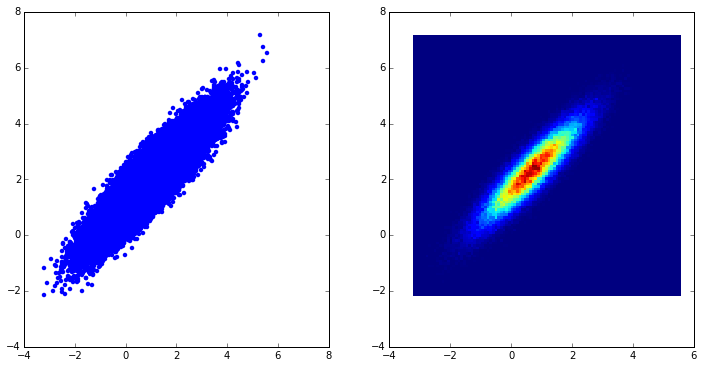

In [15]:
# simple independent gaussians
np.random.seed(0)
# x,y = np.random.randn(2,10000)
mu = [1,2]
cov = [[1,0.9],
       [0.9,1]]
x,y = np.random.multivariate_normal(mu, cov, 100000).T
pylab.figure(figsize=(12,6))
pylab.subplot(1,2,1)
pylab.scatter(x,y, lw=0)
pylab.subplot(1,2,2)
H,xe,ye = np.histogram2d(x,y, bins=(101,101))
pylab.pcolormesh(xe,ye,H)

[0.95620082605106349, 1.9918026519970979] 1.94388420421 0.979717667221 -1.19345230558


/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


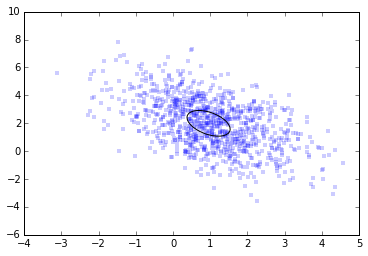

In [88]:
# Exerpt from http://www.astroml.org/book_figures/chapter3/fig_robust_pca.html
np.random.seed(0)
X = stats.bivariate_normal(mu=[1,2], sigma_1=2, sigma_2=1, alpha=2, size=1000)
x, y = X.T

mean, sigma1, sigma2, alpha = stats.fit_bivariate_normal(x, y, robust=True)
print(mean, sigma1, sigma2, alpha)
ax = pylab.gca()
pylab.scatter(x,y, lw=0, alpha=0.2, marker=',')
E = matplotlib.patches.Ellipse(mean, sigma1, sigma2, np.rad2deg(alpha), 
                               ec='k', fc='none')
ax.add_patch(E)

### Correlation Coefficients

In [93]:
x, y = np.random.random((2, 100)) # two random
# arrays
corr_coeff , p_value = scipy.stats.pearsonr(x, y)
rho, p_value = scipy.stats.spearmanr(x, y)
tau, p_value = scipy.stats.kendalltau(x, y)
print(rho, tau)

-0.159735973597 -0.111111111111


### Recreate distribution

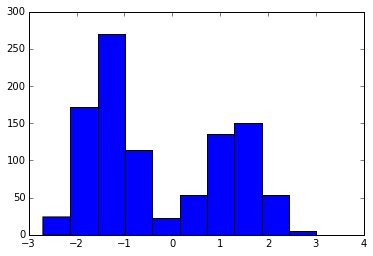

In [96]:
Ndata = 1000
dists = (scipy.stats.norm(-1.3, 0.5), 
        scipy.stats.norm(1.3, 0.5))
fracs = (0.6, 0.4)
x = np.hstack((d.rvs(f * Ndata) for d, f in zip(dists, fracs)))
_ = pylab.hist(x, 10)

KS test: D = 0.0059; p = 1


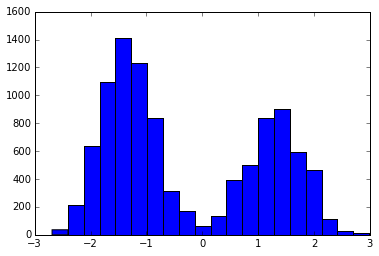

In [104]:
Nclone = 10000
x_cloned = astroML.density_estimation.EmpiricalDistribution(x).rvs(Nclone)

# compute the KS test to check if they're the same
D, p = scipy.stats.ks_2samp(x, x_cloned)
print("KS test: D = %.2g; p = %.2g" % (D, p))
_ = pylab.hist(x_cloned, 20)

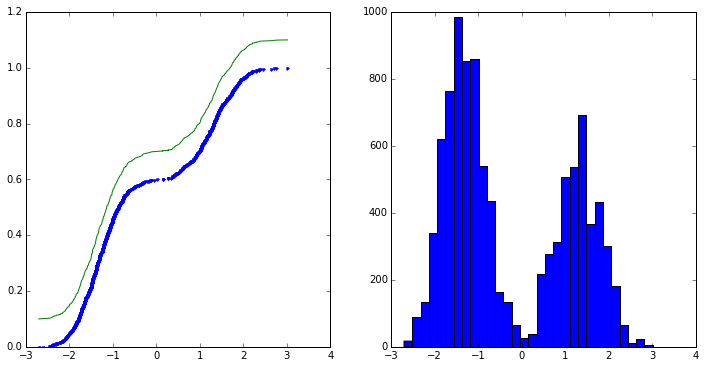

In [122]:
sx = sorted(x)
Px_cuml = np.linspace(0, 1, Ndata)

# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.splrep(Px_cuml, sx)

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata)
x_sample = scipy.interpolate.splev(Px_cuml_sample, tck)

pylab.figure(figsize=(12,6))
pylab.subplot(1,2,1)
pylab.plot(sx, Px_cuml, '.')
pylab.plot(x_sample, Px_cuml_sample+0.1) # add offset for display
pylab.subplot(1,2,2)
_ = pylab.hist(x_sample, 30)